# Price prediction and analysis of used Ford vehicles

## Importing Libraries

In [2]:
# Numerical and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Styling libraries
from matplotlib import style
style.use('seaborn')
import seaborn as sns

In [4]:
# Training and testing libraries
from sklearn.model_selection import train_test_split

In [5]:
# Scaling library
from sklearn.preprocessing import StandardScaler

In [6]:
# Predictive regression models libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [7]:
# Performance metrics libraries
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

## Importing dataset obtained from "https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction"

In [9]:
df = pd.read_csv("./ford.csv")

In [10]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [19]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [20]:
# statistical information about the dataset
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Text(0.5, 1.0, 'Boxplot: Mileage')

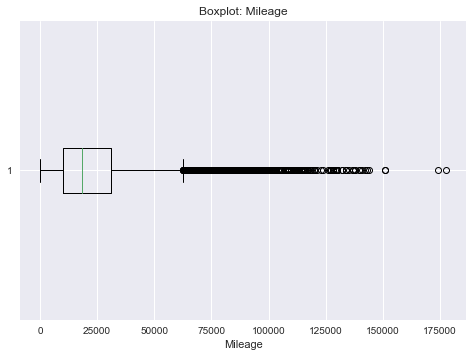

In [93]:
# Checking the value of standard deviation as for mileage it is very high
plt.boxplot(df["mileage"], vert=False)
plt.xlabel("Mileage")
plt.title("Boxplot: Mileage")

In [94]:
#Removing outliers from mileage
low, high = df["mileage"].quantile([0.05,0.90])
mask_ma = df["mileage"].between(low,high)
data = df[mask_ma]

Text(0.5, 1.0, 'Boxplot : Mileage')

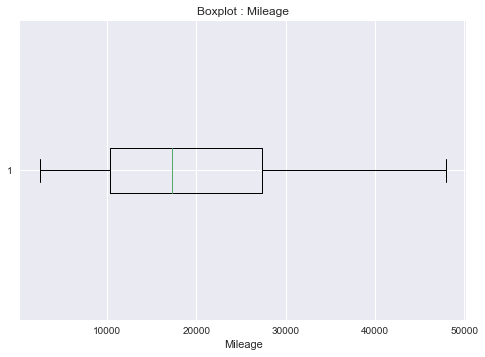

In [97]:
plt.boxplot(x  = data['mileage'] , vert = False)
plt.xlabel("Mileage")
plt.title("Boxplot : Mileage")

In [21]:
# Identifying null values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

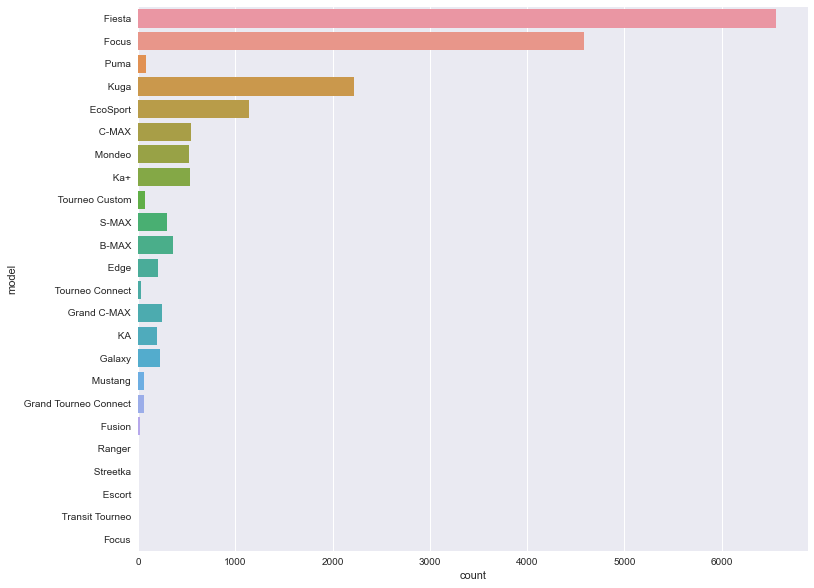

In [24]:
# Exploring categorical data - Models
plt.figure(figsize=(12,10))
sns.countplot(y='model', data=df)
plt.show()

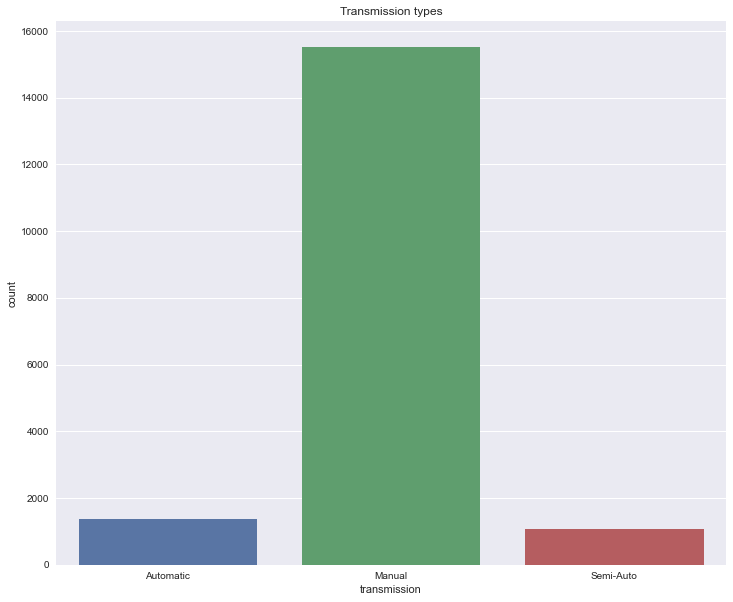

In [27]:
# Exploring categorical data - transmission
plt.figure(figsize=(12,10))
sns.countplot(x='transmission', data=df)
plt.title("Transmission types")
plt.show()

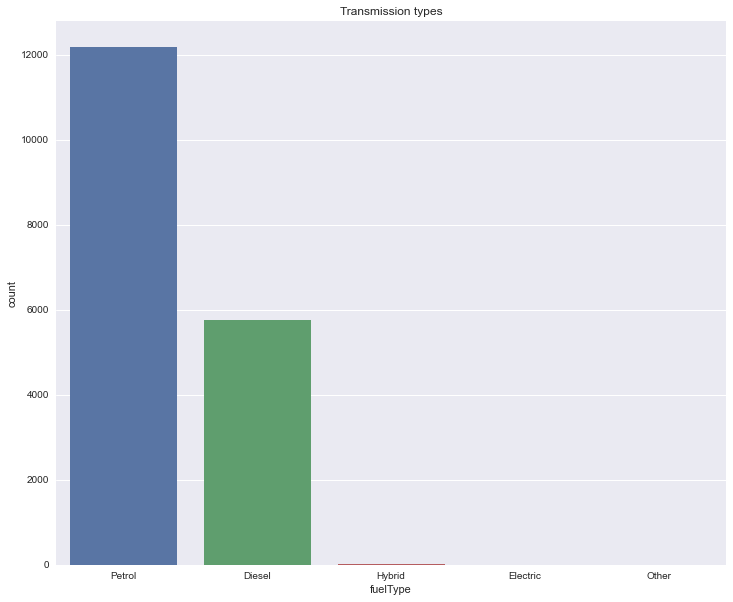

In [28]:
# Exploring categorical data - fuel type
plt.figure(figsize=(12,10))
sns.countplot(x='fuelType', data=df)
plt.title("Transmission types")
plt.show()

In [32]:
# Exact count of the categorical data - Models
[df['model'].value_counts()]

[ Fiesta                   6557
  Focus                    4588
  Kuga                     2225
  EcoSport                 1143
  C-MAX                     543
  Ka+                       531
  Mondeo                    526
  B-MAX                     355
  S-MAX                     296
  Grand C-MAX               247
  Galaxy                    228
  Edge                      208
  KA                        199
  Puma                       80
  Tourneo Custom             69
  Grand Tourneo Connect      59
  Mustang                    57
  Tourneo Connect            33
  Fusion                     16
  Streetka                    2
  Ranger                      1
  Escort                      1
  Transit Tourneo             1
 Focus                        1
 Name: model, dtype: int64]

In [33]:
# Exact count of the categorical data - transmission
[df['transmission'].value_counts()]

[Manual       15518
 Automatic     1361
 Semi-Auto     1087
 Name: transmission, dtype: int64]

In [34]:
# Exact count of the categorical data - fuelType
[df['fuelType'].value_counts()]

[Petrol      12179
 Diesel       5762
 Hybrid         22
 Electric        2
 Other           1
 Name: fuelType, dtype: int64]

In [35]:
# EDA of transmission and fuel type on the car price point
price = df['price']
fuelType = df['fuelType']
transmission = df['transmission']

<AxesSubplot:xlabel='transmission', ylabel='price'>

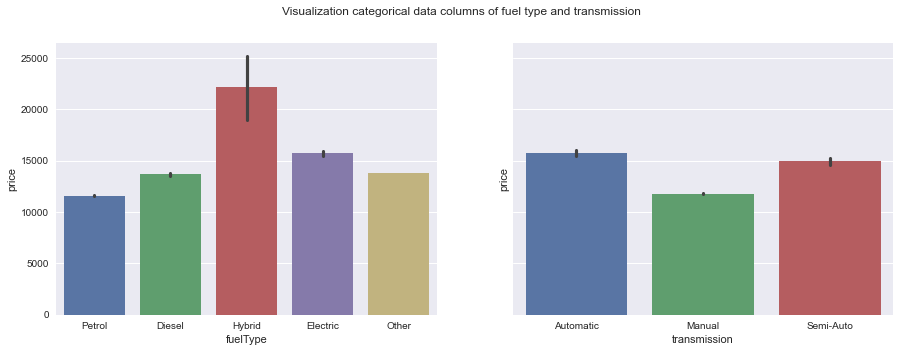

In [36]:
# realationship of transmission and fuelType to price visualization
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle("Visualization categorical data columns of fuel type and transmission")
sns.barplot(x=fuelType , y=price, ax=axes[0])
sns.barplot(x=transmission , y=price, ax=axes[1])

### Categorical values have high importance with respect to the price of the vehicle so we will transform these values using encoding technique

In [39]:
df.replace({"transmission":{'Manual':0,'Automatic':1,'Semi-Auto':2 }},inplace=True)
df.replace({"fuelType":{'Petrol':0,'Diesel':1,'Hybrid':2, 'Electric':3, 'Other':4 }},inplace=True)

In [40]:
# Dropping model as it is a categorical variable with no direct relation to the price point prediction
df = df.drop('model', axis=1)
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


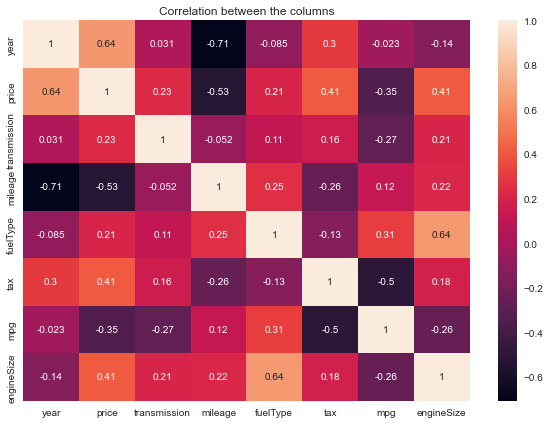

In [41]:
# Heatmap visualization to find correlation between features and the target column
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True )
plt.title('Correlation between the columns')
plt.show()

Since lighter values shows high correlation and darker values shows high correlation, we csn deduce from the heatmap that year, engine size and tax have high correlation to the target variable which is the price while transmission and fuel type also shows significant correlation with the price point

In [43]:
# Quantifying correlation of different features
df.corr()['price'].sort_values()

mileage        -0.530659
mpg            -0.346419
fuelType        0.209225
transmission    0.231806
tax             0.406857
engineSize      0.411178
year            0.636009
price           1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Correlation between year and price'}, xlabel='price', ylabel='year'>

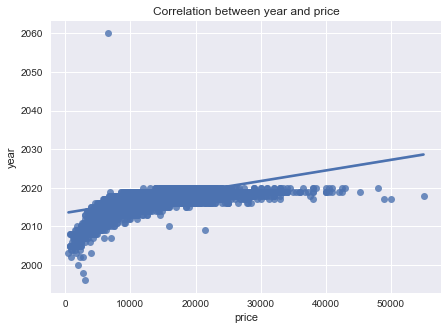

In [45]:
# visulization of most correlated feature using regression plot
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=df)

In [46]:
# Splitting data set into train and test segments 
X = df.drop('price', axis=1)
y = df['price']

In [47]:
# Confirming shape of X and y which are features and target variables
X.shape

(17966, 7)

In [48]:
y.shape

(17966,)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Confirming shape of X and y which are features and target variables
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (12576, 7)
Shape of X_test is: (5390, 7)
Shape of y_train is: (12576,)
Shape of y_test is: (5390,)


In [53]:
# standardizing features to predict the price point of the ford vehicle
scaler = StandardScaler()

In [54]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

## Implementation of different predictive regression models 

In [55]:
# Implementing Regression models - Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
linreg_predict = lin_reg.predict(X_test)

In [56]:
# measuring performance using performance metrics
linreg_mae = mean_absolute_error(y_test, linreg_predict)
linreg_r2 = r2_score(y_test, linreg_predict) # range is between 0-1

In [57]:
print("MAE of linear regression model is:",linreg_mae)
print("R2 of linear regression model is:",linreg_r2)

MAE of linear regression model is: 1768.4913720304828
R2 of linear regression model is: 0.7312941373144171


In [58]:
# Implementing cross validation to see the model accuracy
linear_reg_score = cross_val_score(lin_reg, x_test,y_test, cv=4)

In [59]:
print("Linear regression model accuracy is:{}".format(linear_reg_score.mean()*100))

Linear regression model accuracy is:72.99508724346919


In [61]:
# Implementing Regression models - Decision tree regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
dtree_pred = decision_tree.predict(X_test)

In [64]:
# measuring performance using performance metrics
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred) # range is between 0-1

In [65]:
print("MAE of linear regression model is:",dtree_mae)
print("R2 of linear regression model is:",dtree_r2)

MAE of linear regression model is: 1202.128416821274
R2 of linear regression model is: 0.8502977602259848


In [71]:
# Implementing cross validation to see the model accuracy
dtree_reg_score = cross_val_score(decision_tree, x_test,y_test, cv=4)
print("xgb regression model accuracy is:{}".format(dtree_reg_score.mean()*100))

xgb regression model accuracy is:81.57007174159627


In [66]:
# Implementing Regression models - XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict((X_test))

In [67]:
# measuring performance using performance metrics
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred) # range is between 0-1

In [68]:
print("MAE of linear regression model is:",xgb_mae)
print("R2 of linear regression model is:",xgb_r2)

MAE of linear regression model is: 936.1000546711938
R2 of linear regression model is: 0.9115365181733156


In [70]:
# Implementing cross validation to see the model accuracy
xgb_reg_score = cross_val_score(xgb, x_test,y_test, cv=4)
print("xgb regression model accuracy is:{}".format(xgb_reg_score.mean()*100))

xgb regression model accuracy is:89.17705736898864


From the above-mentioned implementation we can see that after implementing 3 different predictive regression models namely:
- linear regression: accuracy= 72.99, r2_score = 0.73
- Decision tree regression: accuracy= 81.57, r2_score = 0.85
- XGBoost regression: accuracy= 89.18, r2_score = 0.91

XGBoost predictive regression models trains and fits best on the Ford vehicle dataset for car price prediction

## Predicting car price of ford vehicles after training the models using random datasets of the dame domain

In [74]:
df.columns

Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [75]:
df.head(5)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [85]:
data = {'year':2018, 'transmission':0, 'mileage':9083, 'fuelType':0, 'tax':150, 'mpg':57.7,
       'engineSize':1.0}

In [86]:
index=[0]
new_df = pd.DataFrame(data,index)
new_df

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2018,0,9083,0,150,57.7,1.0


In [91]:
carPrice_pred = xgb.predict(new_df)
print("The estimated cost of the car is:",carPrice_pred)

The estimated cost of the car is: [13356.713]


Created a dummy data frame using data from one of the reocrds in ford dataset to see the price prediction. the SGBoost algorithms works really good and helps in predicting close to real price of the car